In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
from sklearn.datasets import make_classification, make_regression

In [12]:
# Gerar dataset de regressão
X, y = make_regression(n_samples=100, n_features=6, n_informative=10)
print(X)

[[-1.52209414e+00 -2.01321151e+00  1.01941347e+00 -1.70472593e+00
  -1.31643866e-01 -7.26066204e-01]
 [ 1.42215542e-01  8.87227429e-01 -1.53841200e+00  1.30084037e-01
  -6.65434015e-01  3.36334091e-01]
 [-1.79630569e+00 -1.66426751e-01  8.26118402e-01  9.42177638e-02
   1.25017225e+00 -6.29447646e-01]
 [ 1.16321081e+00  1.47756758e-01 -3.15291264e-01  1.08159343e+00
  -1.89048420e+00  1.21246790e+00]
 [-6.57064656e-01  9.22839163e-02  4.32748780e-01 -1.27791089e+00
  -6.60044225e-01 -1.84586930e-02]
 [-6.80269159e-01 -5.86388601e-01 -2.23749054e+00 -1.31542832e+00
  -5.41377936e-01 -5.07070726e-01]
 [-1.49952608e+00 -2.93060972e-01 -6.22870394e-01  3.82954805e-02
  -7.40690808e-01 -5.73189580e-01]
 [-7.89512795e-01  7.38014716e-01 -1.84949536e-01 -1.81613291e+00
  -1.96500526e-01 -4.72086812e-01]
 [ 4.84035018e-01 -7.82277626e-01 -1.45132918e+00  8.09708395e-01
  -7.09697011e-01  1.08761825e+00]
 [-7.17236739e-01 -4.03643065e-01 -3.78820725e-01  1.65974844e-01
  -1.28677713e+00 -4.6041

In [13]:
# Colocar dados em um Dataframe Pandas para melhor manipulação
df2 = pd.DataFrame(X)
df2['target'] = y
df2.columns = ['var1', 'var2', 'var3', 'var4','var5', 'var_cat', 'target']
df2.tail()

,var1,var2,var3,var4,var5,var_cat,target
95,1.362067,-1.528630,-0.318138,0.073194,1.495121,1.175969,190.900984
96,-1.161942,-0.577878,0.473594,0.341163,-0.552580,1.559595,-55.206098
97,2.542562,0.738909,-0.681589,0.285368,0.376118,0.702242,168.179597
98,0.697887,0.639914,0.177132,1.766660,0.004799,-2.016724,84.855397
99,-1.328116,-1.264573,-0.676445,1.330704,-0.872428,-1.843281,-199.808556


In [15]:
# Criando variável Categórica baseada na variável target - propositalmente, para termos forte correlação
df2['var_cat'] = pd.cut(df2.target,4, labels=[1,2,3,4])
df2['var_cat'] = df2.var_cat.astype(int)
df2.head(3)

,var1,var2,var3,var4,var5,var_cat,target
0,-1.522094,-2.013212,1.019413,-1.704726,-0.131644,2,-140.202504
1,0.142216,0.887227,-1.538412,0.130084,-0.665434,2,-119.051738
2,-1.796306,-0.166427,0.826118,0.094218,1.250172,3,52.844226


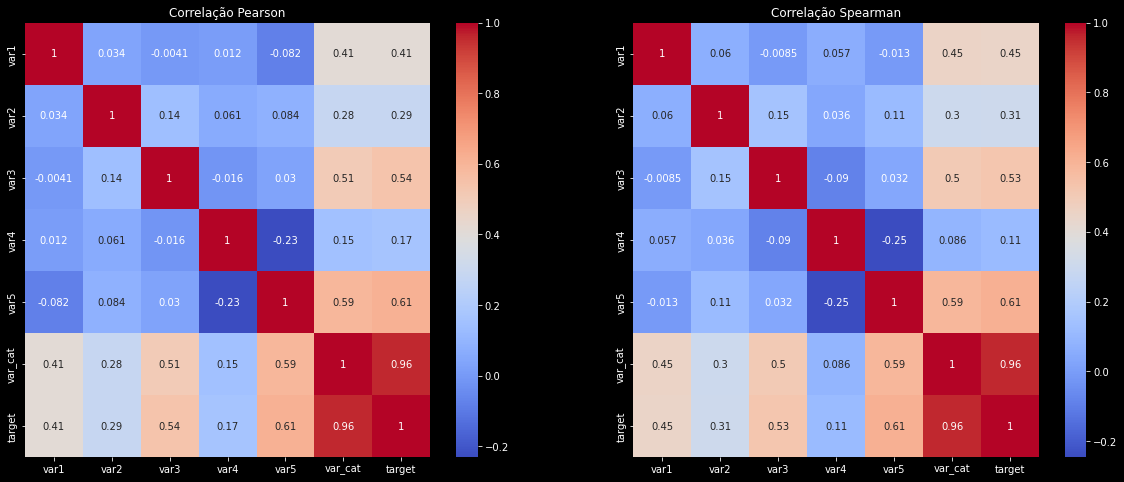

In [16]:
# Correlação Pearson e Spearman
fig, ax = plt.subplots(1,2,figsize=(20,8))
g = sns.heatmap(df2.corr(method='pearson'), cmap='coolwarm', annot=True, ax=ax[0])
g.set_title('Correlação Pearson')
g2 = sns.heatmap(df2.corr(method='spearman'), cmap='coolwarm', annot=True, ax=ax[1])
g2.set_title('Correlação Spearman');

In [18]:
# Load do Dataset
df = sns.load_dataset(name='penguins')
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [19]:
# Verificando dimensões
df.shape

(344, 7)

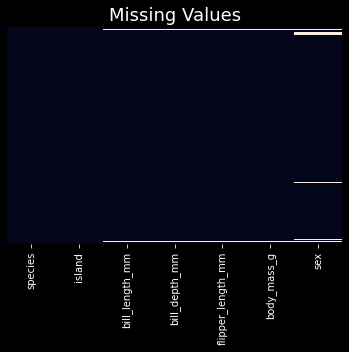

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [21]:
#Verificar valores nulos
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values', size=18)
plt.show()
print(df.info())

In [22]:
df.dropna(inplace=True)
# Cria cópia do dataset
df1 = df.copy()

In [28]:
# Importando library
import pingouin as pg

In [24]:
# Transformando variáveis categóricas
cat = [var for var in df.columns if df[var].dtype=='object']
for col in cat:
  print(f'A variável "{col}" possui {df[col].nunique()} valores únicos: {df[col].unique()}')

A variável "species" possui 3 valores únicos: ['Adelie' 'Chinstrap' 'Gentoo']
A variável "island" possui 3 valores únicos: ['Torgersen' 'Biscoe' 'Dream']
A variável "sex" possui 2 valores únicos: ['Male' 'Female']


In [26]:
df1['species'] = df1.species.map({'Adelie':1, 'Chinstrap':2, 'Gentoo':3})
df1['island'] = df1.island.map({'Torgersen':1, 'Biscoe':2, 'Dream':3})
df1['sex'] = df1.sex.map({'Male':0, 'Female':1})

In [29]:
# Calculando a estatística com ANOVA
aov = []
for variance in df1.columns[:6]:
  v = pg.anova(data=df1, dv='sex', between=variance, detailed=True).round(3)
  aov.append(v)

In [30]:
pd.concat(aov)

,Source,SS,DF,MS,F,p-unc,np2
0,species,0.012,2,0.006,0.024,0.976,0.000
1,Within,83.231,330,0.252,NaN,NaN,NaN
0,island,0.014,2,0.007,0.029,0.972,0.000
1,Within,83.229,330,0.252,NaN,NaN,NaN
0,bill_length_mm,53.519,162,0.330,1.889,0.000,0.643
1,Within,29.724,170,0.175,NaN,NaN,NaN
0,bill_depth_mm,42.777,78,0.548,3.442,0.000,0.514
1,Within,40.466,254,0.159,NaN,NaN,NaN
0,flipper_length_mm,26.592,53,0.502,2.471,0.000,0.319
1,Within,56.651,279,0.203,NaN,NaN,NaN


In [31]:
data = pd.concat(aov)
data = data[data.Source!='Within'][['Source','F']]
data

,Source,F
0,species,0.024
0,island,0.029
0,bill_length_mm,1.889
0,bill_depth_mm,3.442
0,flipper_length_mm,2.471
0,body_mass_g,2.800


C:\Users\binho\anaconda3\envs\estatistica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


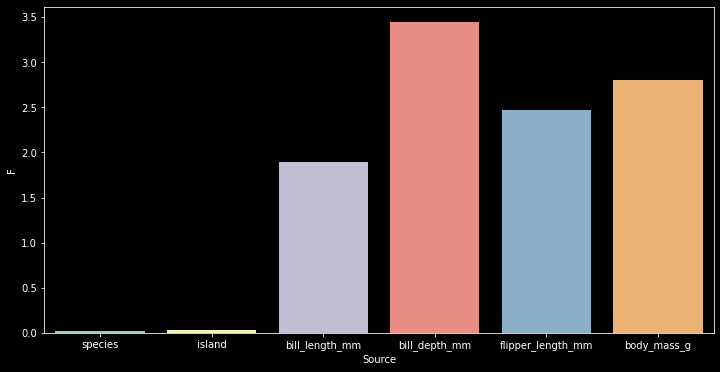

In [32]:
plt.figure(figsize=(12,6))
sns.barplot('Source', 'F', data=data)
plt.show()